In [36]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

## Data Loading

In [37]:
# Load data train
kip_train = pd.read_csv("data/student-data-train.csv")
kip_train.head()

,Alias,Prestasi,NilaiUjian,PenghasilanOrtu,PunyaSejenisKIP,KepemilikanRumah,Target
0,_RARE_,0,65,2.1,0,2,0
1,_RARE_,0,70,2.7,1,2,0
2,_RARE_,1,59,2.6,1,2,0
3,_RARE_,1,80,2.7,0,2,1
4,_RARE_,0,60,2.5,1,2,0


In [38]:
# Load data test
kip_test = pd.read_csv("data/student-data-test.csv")
kip_test.head()

,Alias,Prestasi,NilaiUjian,PenghasilanOrtu,PunyaSejenisKIP,KepemilikanRumah,Target
0,Mahasiswa1,1,55,3.5,1,1,0
1,Mahasiswa2,0,75,2.5,0,2,0
2,Mahasiswa3,1,77,2.2,1,1,1
3,Mahasiswa4,1,50,2.3,0,2,0
4,Mahasiswa5,1,91,2.0,1,2,1


## Exploratory Data Analysis (EDA)

### Deskripsi Variabel

Deskripsi Variabel


In [39]:
# Info Dataset Train
kip_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Alias             1000 non-null   object 
 1   Prestasi          1000 non-null   int64  
 2   NilaiUjian        1000 non-null   int64  
 3   PenghasilanOrtu   1000 non-null   float64
 4   PunyaSejenisKIP   1000 non-null   int64  
 5   KepemilikanRumah  1000 non-null   int64  
 6   Target            1000 non-null   int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 54.8+ KB


In [40]:
# Deskripsi Dataset Train
kip_train.describe()

,Prestasi,NilaiUjian,PenghasilanOrtu,PunyaSejenisKIP,KepemilikanRumah,Target
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.0,1000.000000
mean,0.281000,70.43700,2.471100,0.484000,2.0,0.324000
std,0.449712,8.59639,0.299908,0.499994,0.0,0.468234
min,0.000000,58.00000,2.000000,0.000000,2.0,0.000000
25%,0.000000,60.00000,2.200000,0.000000,2.0,0.000000
50%,0.000000,70.00000,2.500000,0.000000,2.0,0.000000
75%,1.000000,79.00000,2.800000,1.000000,2.0,1.000000
max,1.000000,80.00000,2.900000,1.000000,2.0,1.000000


In [41]:
# Info Dataset Test
kip_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Alias             22 non-null     object 
 1   Prestasi          22 non-null     int64  
 2   NilaiUjian        22 non-null     int64  
 3   PenghasilanOrtu   22 non-null     float64
 4   PunyaSejenisKIP   22 non-null     int64  
 5   KepemilikanRumah  22 non-null     int64  
 6   Target            22 non-null     int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 1.3+ KB


In [42]:
# Deskripsi Dataset Test
kip_test.describe()

,Prestasi,NilaiUjian,PenghasilanOrtu,PunyaSejenisKIP,KepemilikanRumah,Target
count,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000
mean,0.318182,70.318182,2.477273,0.454545,1.863636,0.318182
std,0.476731,16.464641,0.775783,0.509647,0.351250,0.476731
min,0.000000,40.000000,1.100000,0.000000,1.000000,0.000000
25%,0.000000,58.250000,2.025000,0.000000,2.000000,0.000000
50%,0.000000,75.000000,2.500000,0.000000,2.000000,0.000000
75%,1.000000,80.000000,2.900000,1.000000,2.000000,1.000000
max,1.000000,95.000000,3.900000,1.000000,2.000000,1.000000


### Missing Value

In [43]:
# Cek Missing Value Data Train
kip_train.isna().sum()

Alias               0
Prestasi            0
NilaiUjian          0
PenghasilanOrtu     0
PunyaSejenisKIP     0
KepemilikanRumah    0
Target              0
dtype: int64

In [44]:
# Cek Missing Value Data Test
kip_test.isna().sum()

Alias               0
Prestasi            0
NilaiUjian          0
PenghasilanOrtu     0
PunyaSejenisKIP     0
KepemilikanRumah    0
Target              0
dtype: int64

### Menangani Outlier

<Axes: xlabel='Prestasi'>

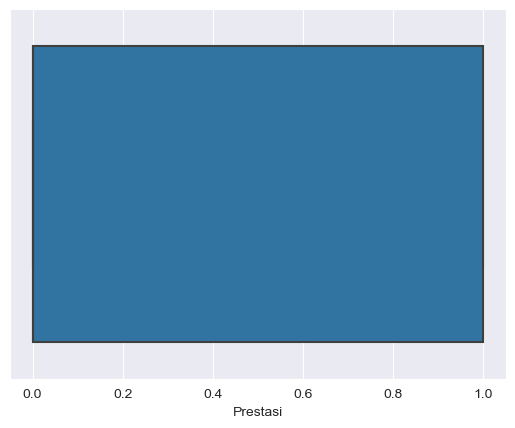

In [45]:
# Outlier Fitur Prestasi
sns.boxplot(x=kip_train['Prestasi'])

<Axes: xlabel='NilaiUjian'>

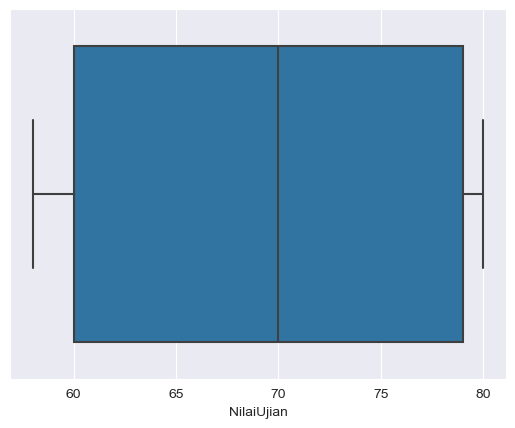

In [46]:
# Outlier Fitur Nilai Ujian
sns.boxplot(x=kip_train['NilaiUjian'])

<Axes: xlabel='PenghasilanOrtu'>

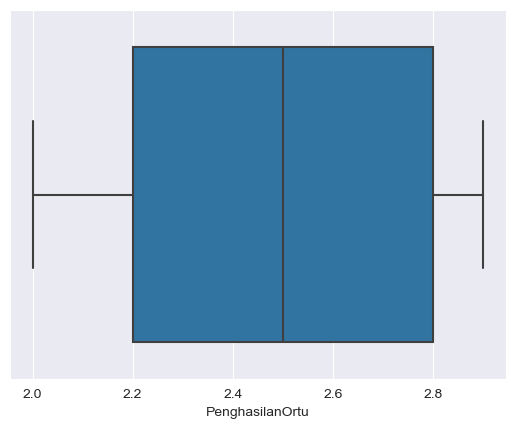

In [47]:
# Outlier Fitur Penghasilan Ortu
sns.boxplot(x=kip_train['PenghasilanOrtu'])

<Axes: xlabel='PunyaSejenisKIP'>

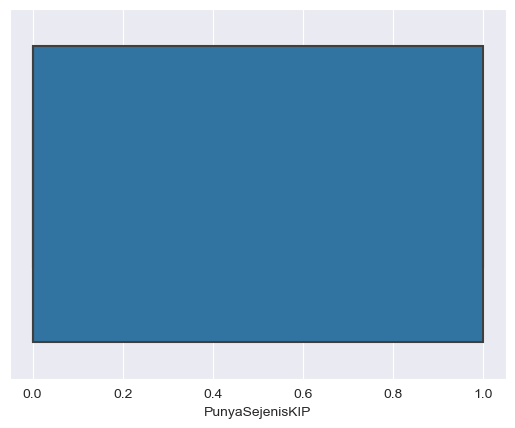

In [48]:
# Outlier PunyaSejenis KIP
sns.boxplot(x=kip_train['PunyaSejenisKIP'])

<Axes: xlabel='KepemilikanRumah'>

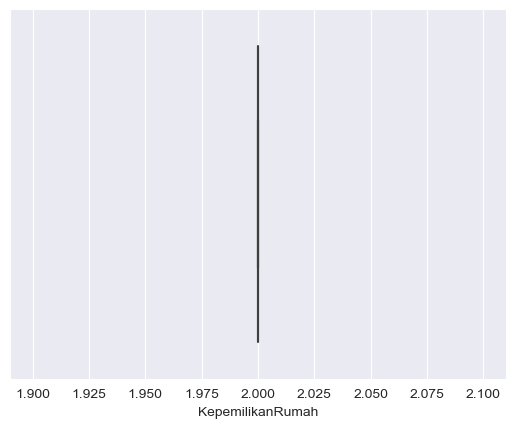

In [49]:
# Outlier Fitur Kepemilikan Rumah
sns.boxplot(x=kip_train['KepemilikanRumah'])

<Axes: xlabel='Target'>

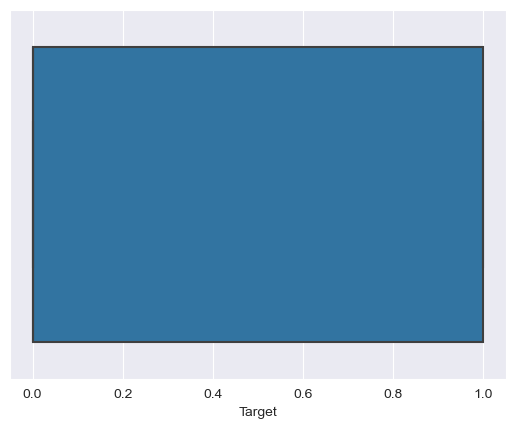

In [50]:
# Outlier Fitur Target
sns.boxplot(x=kip_train['Target'])

### Univariate Analysis

In [52]:
numerical_features = ['NilaiUjian', 'PenghasilanOrtu']
categorical_features = ['Prestasi', 'PunyaSejenisKIP', 'KepemilikanRumah', 'Target']

#### Categorical Features

   jumlah sampel  persentase
0            719        71.9
1            281        28.1


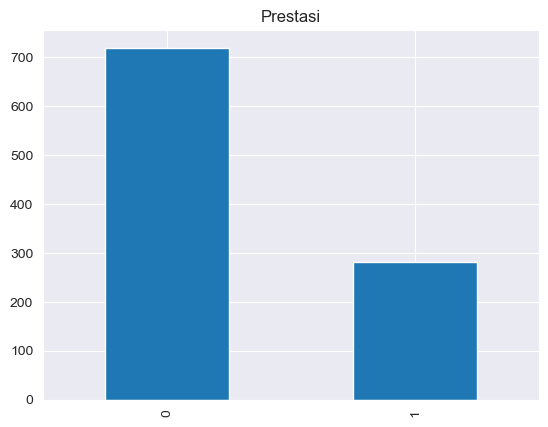

In [53]:
# Fitur Prestasi
feature = categorical_features[0]
count = kip_train[feature].value_counts()
percent = 100*kip_train[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

   jumlah sampel  persentase
0            516        51.6
1            484        48.4


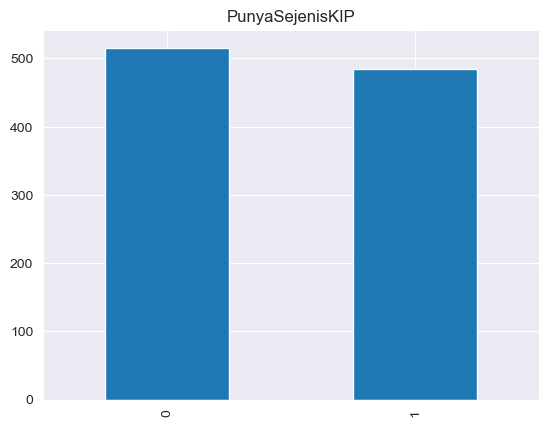

In [54]:
# Fitur Punya Sejenis KIP
feature = categorical_features[1]
count = kip_train[feature].value_counts()
percent = 100*kip_train[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

   jumlah sampel  persentase
2           1000       100.0


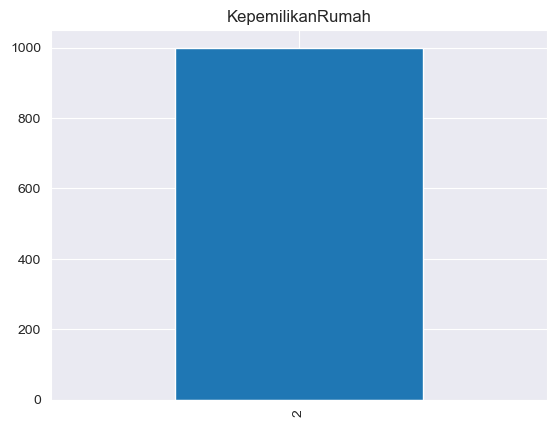

In [55]:
# Fitur Kepemilikan Rumah
feature = categorical_features[2]
count = kip_train[feature].value_counts()
percent = 100*kip_train[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

   jumlah sampel  persentase
0            676        67.6
1            324        32.4


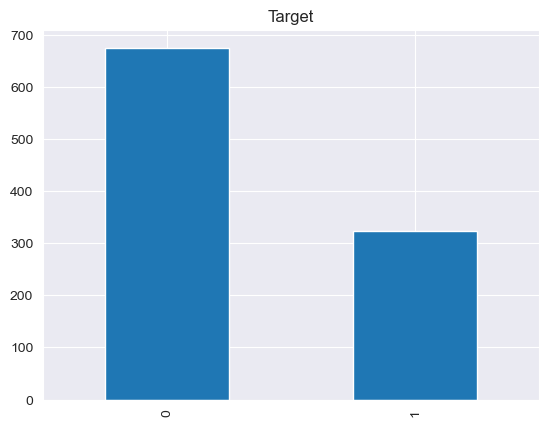

In [56]:
# Fitur Target
feature = categorical_features[3]
count = kip_train[feature].value_counts()
percent = 100*kip_train[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

#### Numerical Features

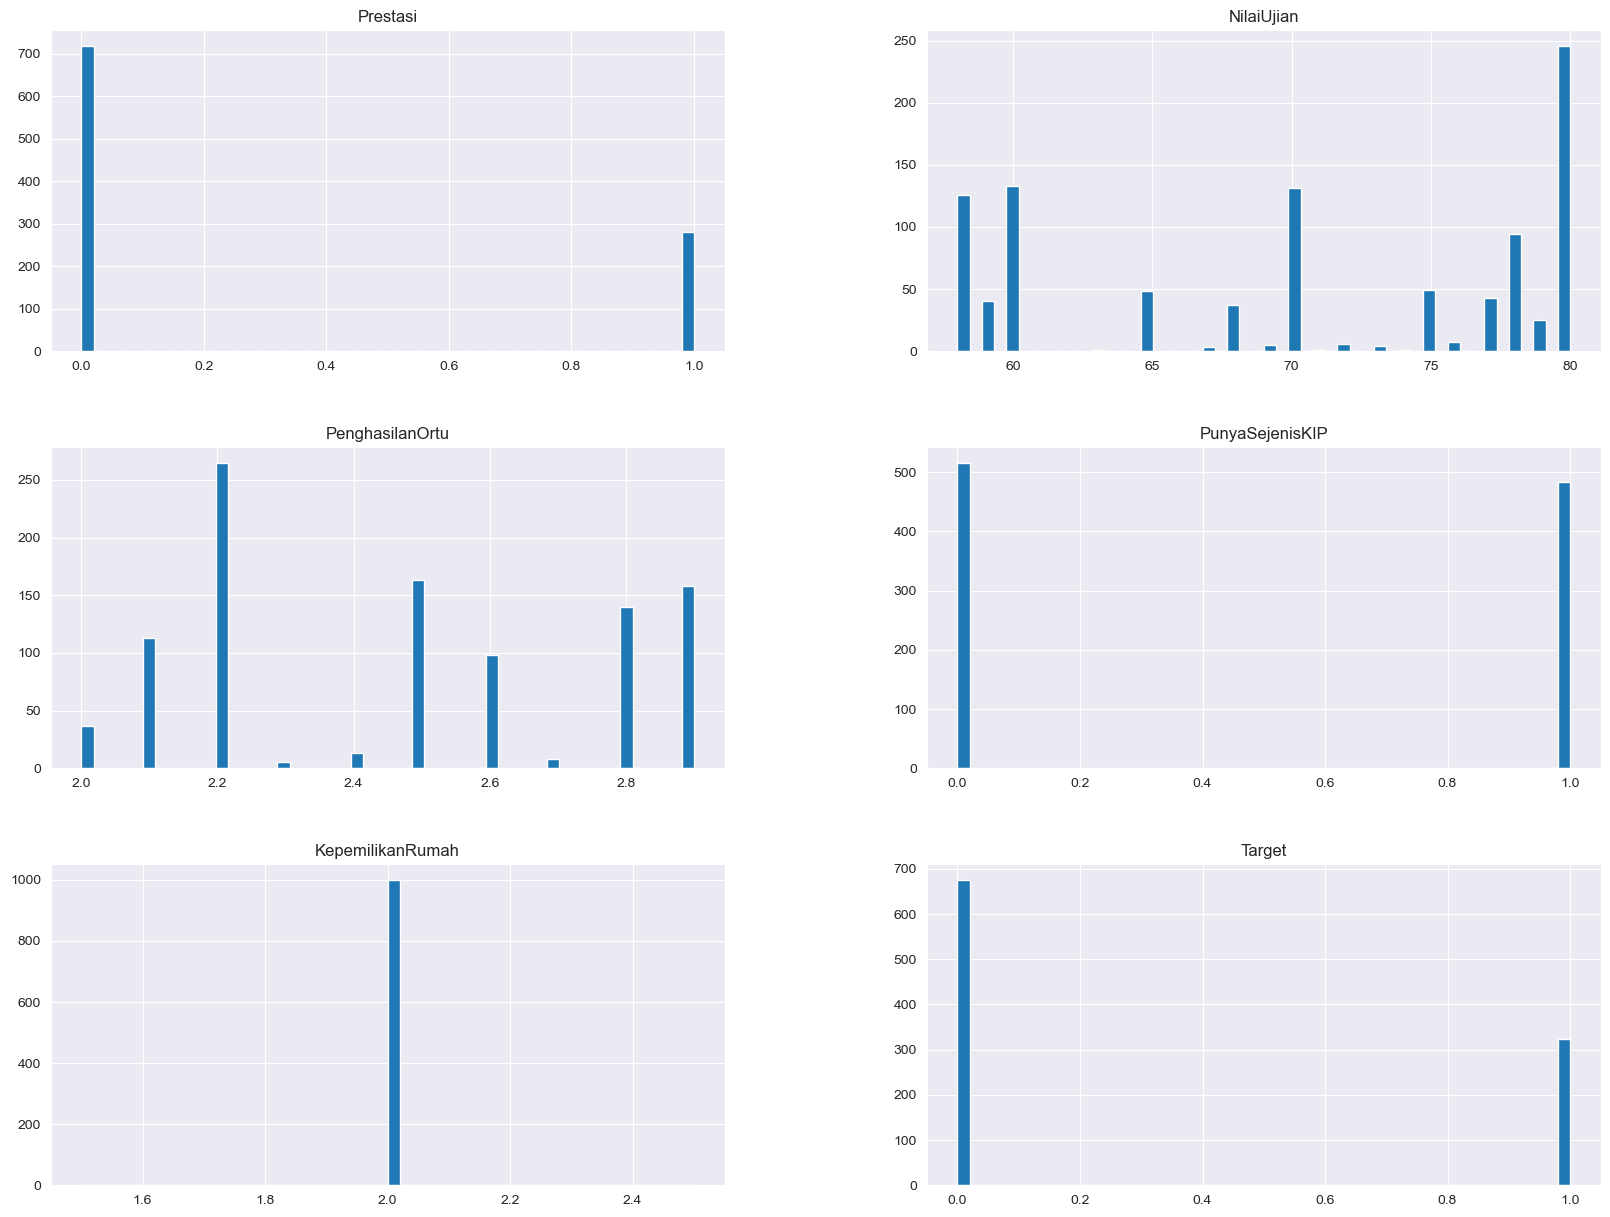

In [57]:
kip_train.hist(bins=50, figsize=(20,15))
plt.show()

### Multivariate Analysis

#### Categorical Features

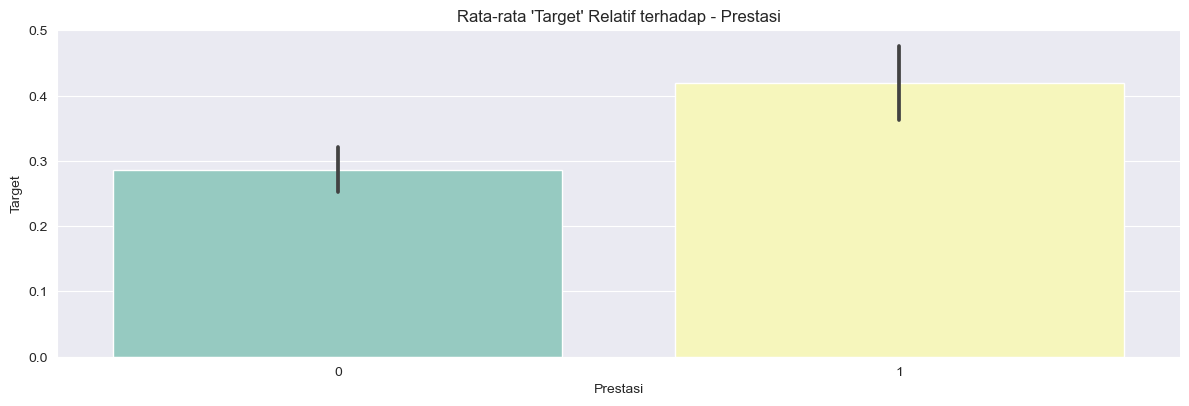

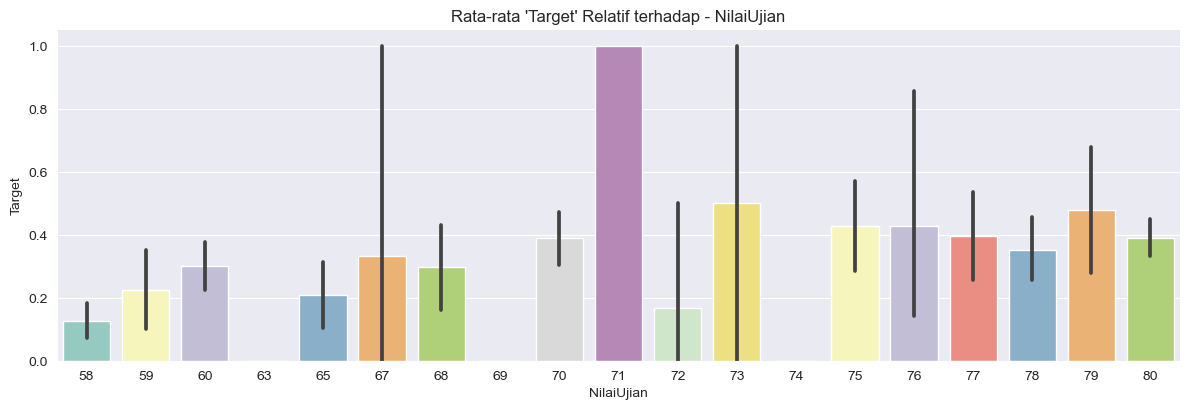

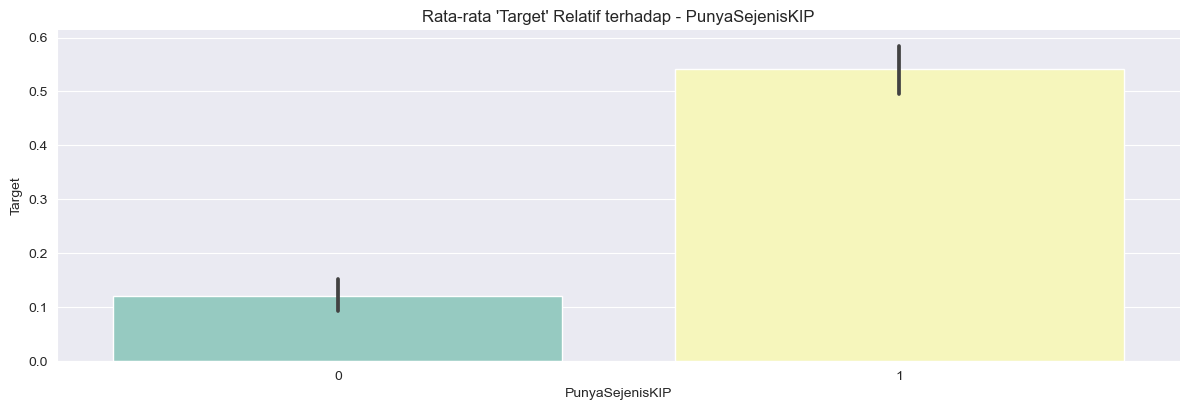

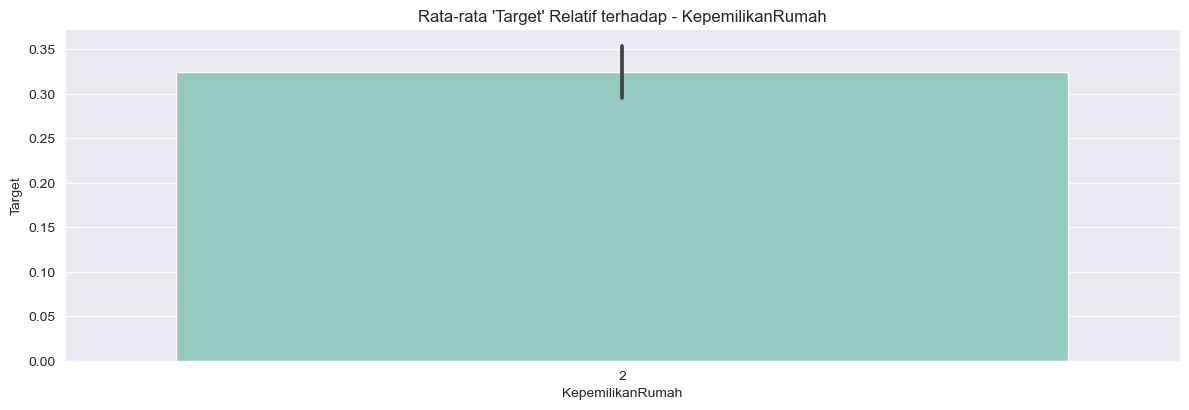

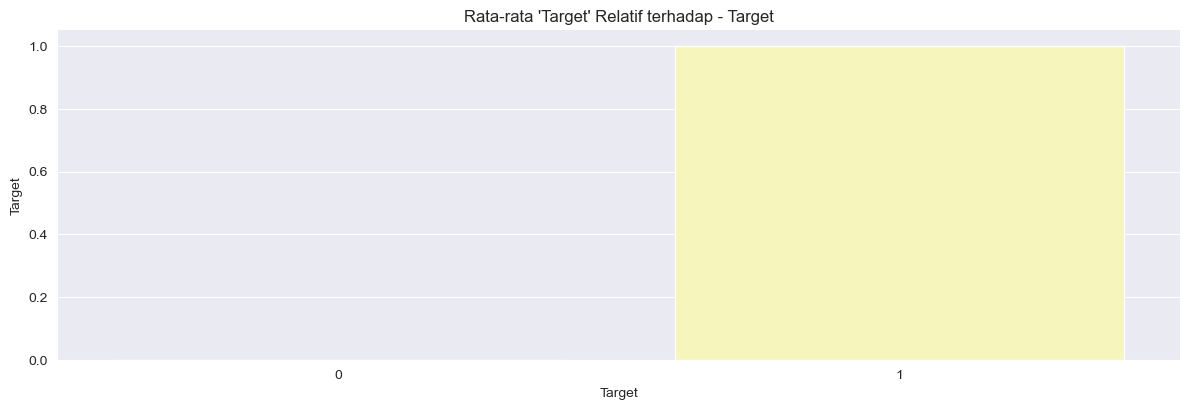

In [60]:
cat_features = kip_train.select_dtypes(include='int64').columns.to_list()
 
for col in cat_features:
  sns.catplot(x=col, y="Target", kind="bar", dodge=False, height = 4, aspect = 3,  data=kip_train, palette="Set3")
  plt.title("Rata-rata 'Target' Relatif terhadap - {}".format(col))

#### Numerical Features

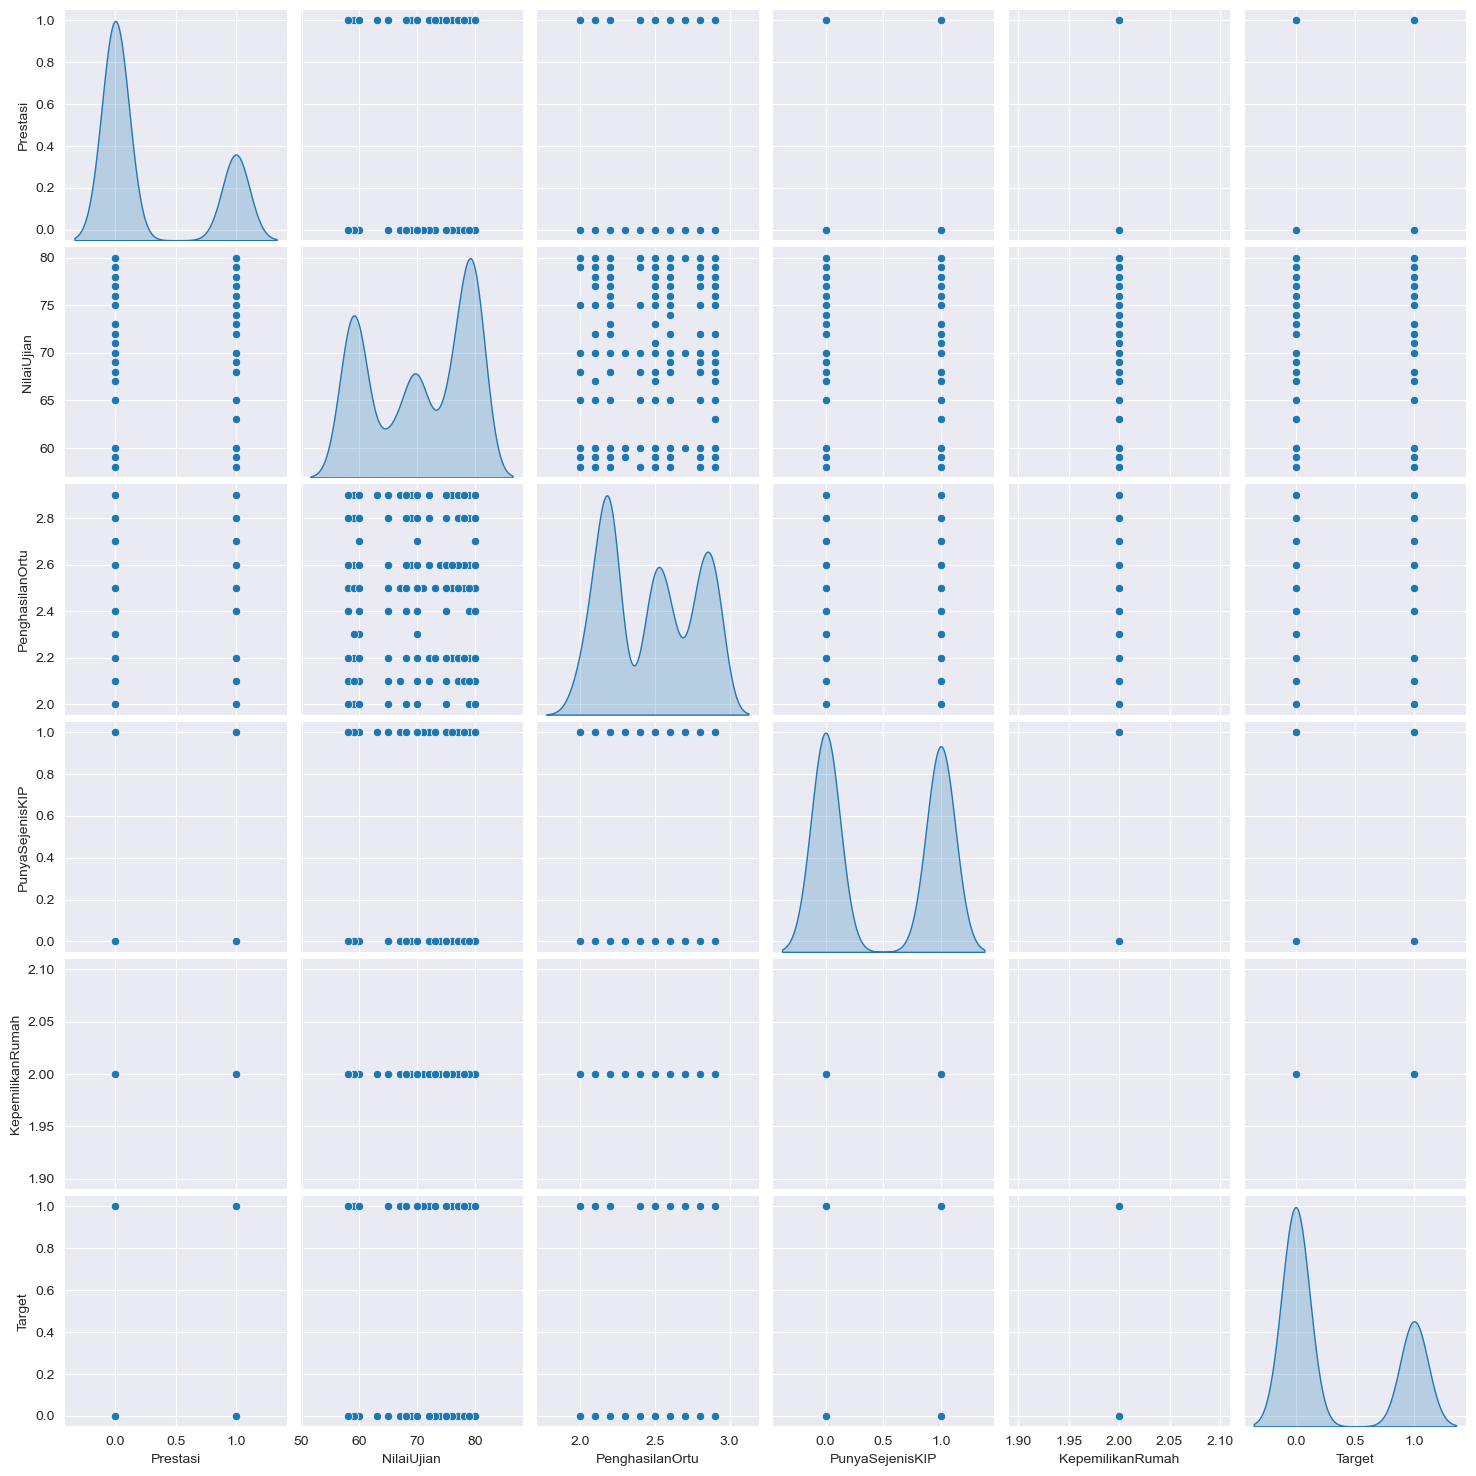

In [61]:
# Mengamati hubungan antar fitur numerik dengan fungsi pairplot()
sns.pairplot(kip_train, diag_kind = 'kde')

/tmp/ipykernel_30552/165376148.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = kip_train.corr().round(2)


Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

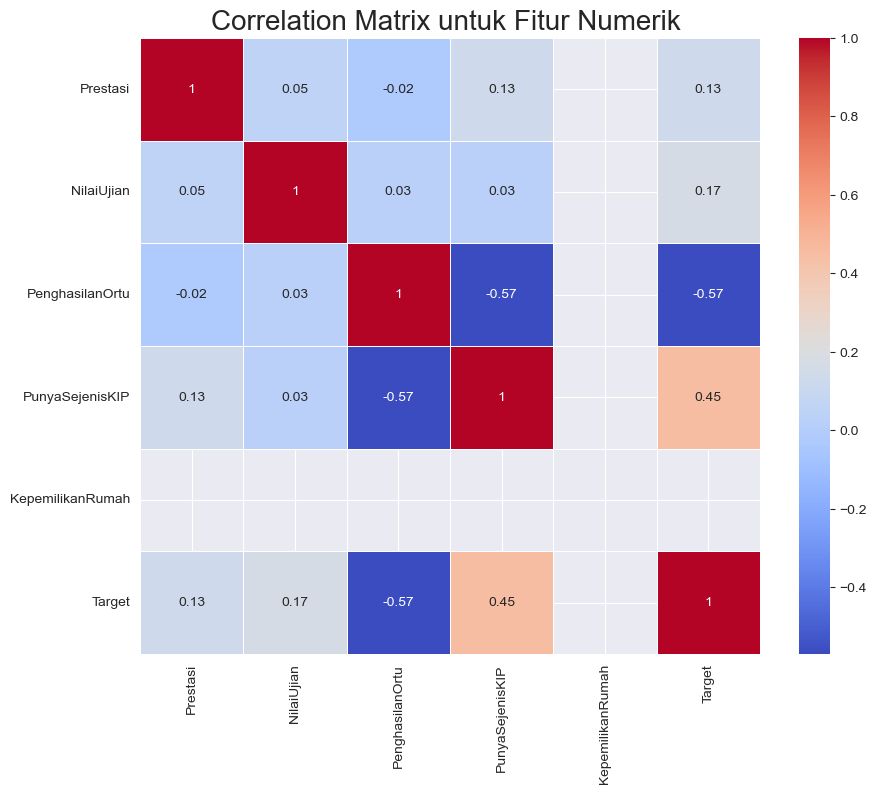

In [62]:
plt.figure(figsize=(10, 8))
correlation_matrix = kip_train.corr().round(2)
 
# Untuk menge-print nilai di dalam kotak, gunakan parameter anot=True
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)